# K-Nearest-Neighbors (KNN)

## Introduction

In this exercise, we will analyze the price per night on Airbnb (in copenhagen). The dataset is available on the website [Airbnb Inside](http://insideairbnb.com/get-the-data.html), and we already downloaded the CSVs in the exercise folder. They are located under the data subfolder, no need for you to download it again.

Our goal is to __predict the price per night thanks to the KNN Algorithm__. 

## Data Exploration

- Read the file 'listings-copenhague.csv'
- Display the first 3 lines of the listing

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

copenhagen_listing = pd.read_csv('data/listings-copenhague.csv', low_memory=False)
copenhagen_listing = copenhagen_listing[columns]
copenhagen_listing.head(3)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,2,1.0,1.0,1.0,$361.00,2,15,167
1,6,4.0,1.5,4.0,"$2,397.00",3,30,46
2,12,6.0,2.5,8.0,"$3,100.00",3,31,259


# KNN with one feature

As you can notice, we have different features (columns) available. To simplifify this exercise, we will first focus on one single column : __bedrooms__. 

## Euclidean Distance 

- Create a new column named "distance" and compute the euclidean distance between each example and __a two bedrooms apartment__
- Display the result in a bar plot (distance on X-axis and number of apartmentst corresponding to each distance on Y-axis

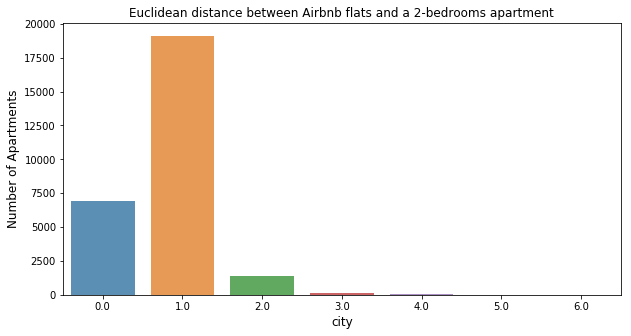

In [198]:
target_value = 2 # two bedrooms apartment
copenhagen_listing['distance'] = copenhagen_listing['bedrooms'].apply(lambda x: np.abs(x - target_value))
distance_count = copenhagen_listing['distance'].value_counts()

# Plot bar 
plt.figure(figsize=(10,5))
sns.barplot(distance_count.index, distance_count.values, alpha=0.8)
plt.title('Euclidean distance between Airbnb flats and a 2-bedrooms apartment')
plt.ylabel('Number of Apartments', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

## Randomize and sort

- Randomize the dataframe (so it doesn't depend on the order of the examples)
- Sort the dataframe by distance
- Display the 5 first results (__k = 5__)
- __Hint__ : np.random.permutation(), loc[]

In [199]:
np.random.seed(1) # So we get the same results
copenhagen_listing = copenhagen_listing.loc[np.random.permutation(len(copenhagen_listing))] # randomize
copenhagen_listing = copenhagen_listing.sort_values("distance") # sort by distance
copenhagen_listing.head(5)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
18974,5,2.0,1.0,4.0,$893.00,5,31,6,0.0
22486,4,2.0,1.0,2.0,$952.00,2,1125,0,0.0
9084,3,2.0,1.0,2.0,$808.00,4,1125,16,0.0
197,3,2.0,1.0,3.0,$473.00,4,31,14,0.0
17122,3,2.0,1.0,2.0,$926.00,2,14,27,0.0


## Clean the data

- Replace the values in the column "price" with the same value but without the "$" and the commas.
- Convert the type from string to float

In [200]:
stripped_commas = copenhagen_listing["price"].str.replace(',', "")
stripped_dollars = stripped_commas.str.replace('$', "")
copenhagen_listing["price"] = stripped_dollars.astype('float')
copenhagen_listing.head(5)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
18974,5,2.0,1.0,4.0,893.0,5,31,6,0.0
22486,4,2.0,1.0,2.0,952.0,2,1125,0,0.0
9084,3,2.0,1.0,2.0,808.0,4,1125,16,0.0
197,3,2.0,1.0,3.0,473.0,4,31,14,0.0
17122,3,2.0,1.0,2.0,926.0,2,14,27,0.0


## Mean price

- Calculate the mean price of the five nearest values
- Display the result.

In [201]:
mean_price = copenhagen_listing[:5]["price"].mean()
print(mean_price)

810.4


# Multivariate K-nearest Neighbors

Congratulations, you just made your first prediction based on the K (=5) nearest neighbors. It's a big step ! However, this model is not perfect. In the following we will work on 2 different aspects to improve our model :
- How many neighbors should we use ? --> Choose the value of K
- Which features should we include in the model ? --> Choose the relevant columns

To do that, we will now use the Scikit-Learn library, which is a very helpful library to do the exact same thing we did until now (but in just a few lines). With this library, it's always the same 4 steps :
1. Instanciate the Machine Learning model we want to use (for ex : KNN Regressor --> class KNeighborsRegressor)
2. Adapt the model with the training data
3. Use the model to make predictions
4. Evaluate the precision of these predictions

### Normalize the columns (Optional)

- Normalize the columns and assign it to the variable `normalized_listing` and add it the column 'price' (not normalized!)
- Display the first 3 lines of these new dataframe

In [202]:
normalized_listing = (copenhagen_listing - copenhagen_listing.mean())/copenhagen_listing.std()
normalized_listing['price'] = copenhagen_listing['price']
normalized_listing.head(3)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance
18974,1.017439,0.506533,-0.250096,1.166602,893.0,0.110926,-0.73435,-0.277561,-1.475587
22486,0.407064,0.506533,-0.250096,-0.130431,952.0,-0.130228,0.60701,-0.511390,-1.475587
9084,-0.203311,0.506533,-0.250096,-0.130431,808.0,0.030542,0.60701,0.112154,-1.475587


### KNeighborsRegressor

- Instanciate and train your model on the whole dataframe (use __k = 5__ and the columns 'bedrooms' and 'accommodates')

__Hint__ : checks the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [203]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, algorithm = "brute")
train_columns = ['bedrooms', 'accommodates']
knn.fit(copenhagen_listing[train_columns], copenhagen_listing['price'])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

### Make predictions

- Add a new column "predicted_price" to the dataframe with the price predicted by your 2 features model

In [204]:
predictions = knn.predict(copenhagen_listing[train_columns])
copenhagen_listing["predicted_price"] = predictions

In [205]:
copenhagen_listing.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,distance,predicted_price
18974,5,2.0,1.0,4.0,893.0,5,31,6,0.0,778.8
22486,4,2.0,1.0,2.0,952.0,2,1125,0,0.0,1216.2
9084,3,2.0,1.0,2.0,808.0,4,1125,16,0.0,726.4
197,3,2.0,1.0,3.0,473.0,4,31,14,0.0,726.4
17122,3,2.0,1.0,2.0,926.0,2,14,27,0.0,726.4


### Evaluate the precision of your predictions (MSE and RMSE)

- Calcul de Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE)

In [206]:
from sklearn.metrics import mean_squared_error

two_features_mse = mean_squared_error(predictions, copenhagen_listing['price'])
two_features_rmse = two_features_mse**(1/2)
print(two_features_mse)
print(two_features_rmse)

632970.0943070238
795.5941768936119


# Improve your model by selecting the right features and K

- Create a new model and trained it with all the columns (except the price of course) and K = 10
- Compare the MSE and RMSE with the previous values

In [209]:
knn = KNeighborsRegressor(n_neighbors = 10, algorithm = "brute")
train_columns = copenhagen_listing.columns.drop(["price", "predicted_price"])
knn.fit(copenhagen_listing[train_columns], copenhagen_listing['price'])
train_columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'distance'],
      dtype='object')

In [210]:
predictions = knn.predict(copenhagen_listing[train_columns])
copenhagen_listing["predicted_price_all_features"] = predictions

In [211]:
two_features_mse = mean_squared_error(predictions, copenhagen_listing['price'])
two_features_rmse = two_features_mse**(1/2)
print(two_features_mse)
print(two_features_rmse)

546941.0122020275
739.5546039353873


# (Optional) Optimize your model

- plot the MSE vs the number of features you use (fix K to 10)
- plot the MSE vs the value of K (keep the columns "accommodates","bedrooms" and "beds")
- __Note__ : This exercise can take a while to compute... (alternative : keep a subset of the DF)

In [184]:
#all_columns = copenhagen_listing.columns.drop(["price","distance", "predicted_price", "predicted_price_all_features"])
#all_columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'number_of_reviews'],
      dtype='object')

In [185]:
#n_features = []
#MSE_values = []
#all_columns = copenhagen_listing.columns.drop(["price","distance", "predicted_price", "predicted_price_all_features"])
#train_columns = []
#knn = KNeighborsRegressor(n_neighbors = 10, algorithm = "brute")
#for col in all_columns:
#    train_columns.append(col)
#    n = len(train_columns)
#    n_features.append(n)
#    knn.fit(copenhagen_listing[train_columns], copenhagen_listing['price'])
#    predictions = knn.predict(copenhagen_listing[train_columns])
#    mse = mean_squared_error(predictions, copenhagen_listing['price'])
#    MSE_values.append(mse)

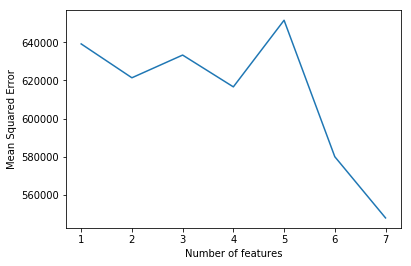

In [186]:
#plt.plot(n_features, MSE_values)
#plt.ylabel('Mean Squared Error')
#plt.xlabel('Number of features')
#plt.show()

In [193]:
#k_values = range(1,21)
#MSE_values = []
#train_columns = ["accommodates","bedrooms", "beds"]
#for k in k_values:
#    knn = KNeighborsRegressor(n_neighbors = k, algorithm = "brute")
#    knn.fit(copenhagen_listing[train_columns], copenhagen_listing['price'])
#    predictions = knn.predict(copenhagen_listing[train_columns])
#    mse = mean_squared_error(predictions, copenhagen_listing['price'])
#    MSE_values.append(mse)

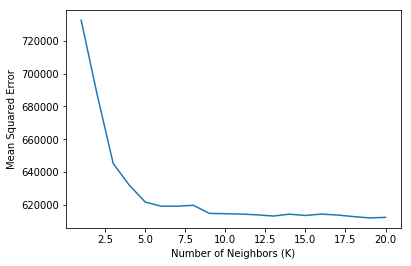

In [194]:
#plt.plot(k_values, MSE_values)
#plt.ylabel('Mean Squared Error')
#plt.xlabel('Number of Neighbors (K)')
#plt.show()